In [172]:
%config IPCompleter.greedy = True

In [173]:
import numpy as np

import torch
from torch import nn, optim
import torch.nn.functional as F

from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

import helper

In [174]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_set = datasets.MNIST('MNIST_data', download = True, train = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle = True)

In [175]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    nn.Softmax(dim = 1)
)

In [176]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [177]:
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        steps += 1
        images.resize_(images.shape[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            '''
            print("Epoch {} / {}".format(e+1, epochs),
                  "{:6.4f}".format(running_loss/print_every)
                  )
            running_loss = 0
            '''

In [178]:
# Check how trained model is predicting trained dataset
data_iter = iter(train_loader)
images, labels = next(data_iter)
img = images[0].view(1, 784)

In [179]:
with torch.no_grad():
    logits = model.forward(img)

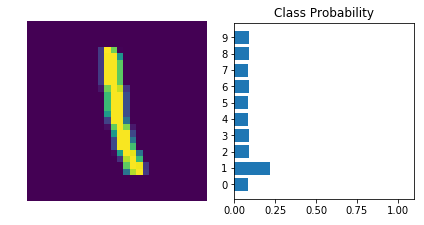

In [180]:
ps = F.softmax(logits, dim = 1)
helper.view_classify(img.view(1, 28, 28), ps)